In [1]:
%load_ext autoreload

In [84]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
MODULES_PATH = os.path.join(BASE_PATH, "modules")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")

In [6]:
sys.path.append(MODULES_PATH)

In [7]:
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer

In [8]:
experiment_path = os.path.join(METRICS_PATH, "2_y_gal_sample")
metrics_handler = ExperimentSuitMetrics(experiment_path)

In [20]:
dtypes = {
    "labeled_pool_size": int,
    "eval_accuracy": float,
    "eval_loss": float,
    "query_time": float
}

In [63]:
df_sample_base = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_1_", dtype=dtypes)
df_sample_5 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_5", dtype=dtypes)
df_sample_15 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_10", dtype=dtypes)
df_sample_25 = MetricsTransformer.load_from_dir(metrics_handler, "sample_size_25", dtype=dtypes)

In [64]:
df_sample_base.insert(0, "sample_size", 1)
df_sample_5.insert(0, "sample_size", 5)
df_sample_15.insert(0, "sample_size", 15)
df_sample_25.insert(0, "sample_size", 25)

In [65]:
merged = pd.concat([df_sample_base, df_sample_5, df_sample_15, df_sample_25])

Text(0.5, 1.0, '#Samples=25')

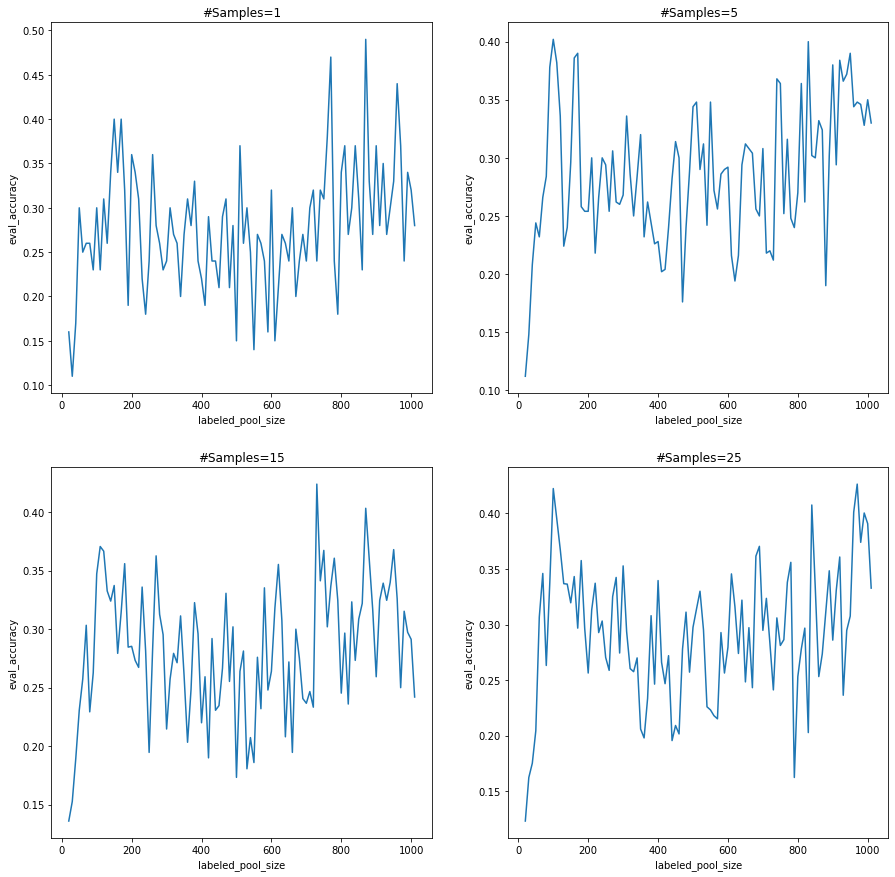

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.lineplot(ax=axes[0, 0], data=df_sample_base, y="eval_accuracy", x="labeled_pool_size")
axes[0, 0].set_title("#Samples=1")

sns.lineplot(ax=axes[0, 1], data=df_sample_5, y="eval_accuracy", x="labeled_pool_size")
axes[0, 1].set_title("#Samples=5")

sns.lineplot(ax=axes[1, 0], data=df_sample_15, y="eval_accuracy", x="labeled_pool_size")
axes[1, 0].set_title("#Samples=15")

sns.lineplot(ax=axes[1, 1], data=df_sample_25, y="eval_accuracy", x="labeled_pool_size")
axes[1, 1].set_title("#Samples=25")

<AxesSubplot:xlabel='labeled_pool_size', ylabel='eval_accuracy'>

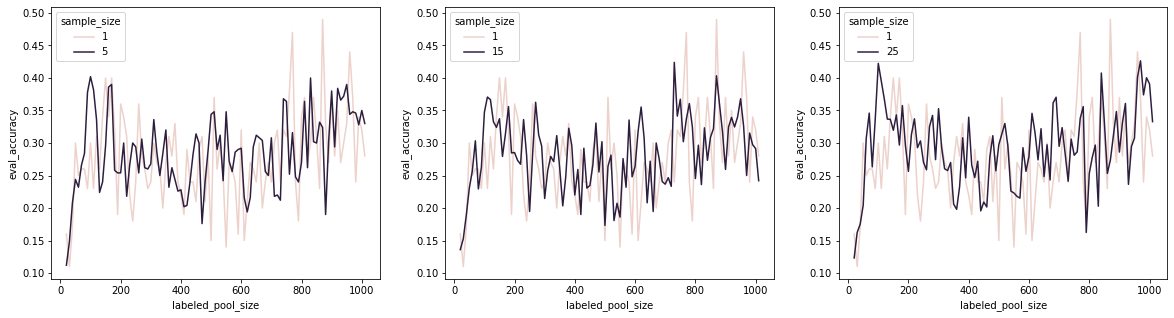

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.lineplot(data=pd.concat([df_sample_base, df_sample_5]), ax=axes[0], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")
sns.lineplot(data=pd.concat([df_sample_base, df_sample_15]), ax=axes[1], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")
sns.lineplot(data=pd.concat([df_sample_base, df_sample_25]), ax=axes[2], y="eval_accuracy", x="labeled_pool_size", hue="sample_size")